# 🍽️ Zomato Restaurants Data Analysis Project

### 📊 Exploratory Data Analysis (EDA)

This notebook analyzes the Zomato Bangalore restaurants dataset to discover:
- Locations with best-rated restaurants
- Effect of online order & table booking on ratings
- Most popular cuisines & restaurant types
- Cost vs Rating patterns and insights

---

🔗 **Dataset Source:** Kaggle - Zomato Dataset (Bengaluru)

🛠️ **Phase 1: Project Setup & Libraries**
We import all required libraries, configure display options,
and prepare folder structure for outputs.


# Import Libraries

In [1]:
# ==============================
# 📦 Importing Essential Libraries
# ==============================

# ------------------------------
# OS & System
# ------------------------------
import os
import warnings
import distutils.core
from datetime import datetime
from typing import Any

# ------------------------------
# Data Handling
# ------------------------------
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_colwidth', 100)

# ------------------------------
# Regular Expressions
# ------------------------------
import re

# ------------------------------
# Logging
# ------------------------------
import logging

# ------------------------------
# Visualization
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, HTML

# Maximize Jupyter Notebook width
display(HTML("<style>.container { width:95% !important; }</style>"))

# Optional: missing data visualization
import missingno as msno

# ------------------------------
# Machine Learning / Preprocessing
# ------------------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mutual_info_score

# ------------------------------
# Warnings
# ------------------------------
warnings.filterwarnings("ignore")

print("✔️ Libraries imported successfully!")


✔️ Libraries imported successfully!


# Display Configurations

In [2]:
# ===================================
# ⚙️ Display & Visualization Settings
# ===================================
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1500)

plt.style.use('ggplot')
sns.set_palette("deep")

print("✔️ Display settings applied!")

logging.basicConfig(
    level=logging.INFO,
    format="[%(levelname)s] %(message)s"
)
logger = logging.getLogger("DataPipeline")



✔️ Display settings applied!


## 📥  Data Collection / Loading

In this step, we load the dataset into the notebook to start exploring it.

**Objectives:**
- Read the Zomato dataset into a DataFrame
- Confirm successful loading (shape, columns)
- Quick peek at the first rows before any processing


In [3]:

# Local path to your CSV
file_path = r"C:\Users\user\Downloads\project_structure\data\raw\zomato.csv"

df = pd.read_csv(file_path, encoding='latin-1')



In [4]:
print("✔️ Data Loaded Successfully!")
print("Shape:", df.shape)  # rows, columns
df.head()


✔️ Data Loaded Successfully!
Shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0...,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0Iiw...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Banga...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Bir...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for dinner with family. Turned out to be a good choose su...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MD...,"1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that good enough and it's not a pocket friendly cafe an...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi-bhojana-banashankari?context=eyJzZSI6eyJlIjpbIjU4...,"1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper Karnataka style full meals. Been there twice and ...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village-basavanagudi?context=eyJzZSI6eyJlIjpbIjU4Njk0Iiwi...,"10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi,...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant in neighbourhood. Buffet system is properly arrang...",[],Buffet,Banashankari


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

🔍 **Quick Insights:**
- Dataset contains restaurants in Bangalore
- Several text/object columns → need cleaning
- Rating column has mixed formats
- Some columns likely contain missing or invalid values  


## 🔍  Data Overview & Profiling

Here we explore the structure and quality of data.

**Tasks:**
- Check number of missing values per column
- Count duplicate records
- Understand the distribution of basic metadata


In [6]:
import missingno as msno
import matplotlib.pyplot as plt

print("Missing Values Overview")
df.isnull().sum().sort_values(ascending=False)


Missing Values Overview


dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

In [7]:
print("Duplicate Rows Check")
print("Number of duplicated rows:", df.duplicated().sum())


Duplicate Rows Check
Number of duplicated rows: 0


In [8]:
df.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,"51,717.00",50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().mean()

url                           0.00
address                       0.00
name                          0.00
online_order                  0.00
book_table                    0.00
rate                          0.15
votes                         0.00
phone                         0.02
location                      0.00
rest_type                     0.00
dish_liked                    0.54
cuisines                      0.00
approx_cost(for two people)   0.01
reviews_list                  0.00
menu_item                     0.00
listed_in(type)               0.00
listed_in(city)               0.00
dtype: float64

📌 **Observations**
- Some columns have a high percentage of null values
- Duplicate records exist → must be removed in cleaning step
- Text columns have messy formatting  


In [10]:
df.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

# ✅ 02 - Data Cleaning & Exploration
Welcome to the magical land of **data cleaning**! 🧹✨  
Here we explore, clean, and make our dataset sparkle.

---

## 📌 Columns Name Update
Time for some renaming magic ✏️  
We’ll update column names to be consistent, readable, and Python-friendly.

---

In [11]:
df.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [12]:
# Rename Some long Columns Name
df.rename(columns={
    'approx_cost(for two people)':'approx_cost',
    'listed_in(type)':'listed_type',
    'listed_in(city)':'listed_city'},inplace=True)

df.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost',
 'reviews_list',
 'menu_item',
 'listed_type',
 'listed_city']

In [13]:
# Exploring Head 1 in Transpose view to explore the unnecessary clomuns to drop
df.sample(3).T

,48493,45851,4677
url,https://www.zomato.com/bangalore/roll-er-dokaan-brigade-road?context=eyJzZSI6eyJlIjpbIjU1MzQ2Iiw...,https://www.zomato.com/bangalore/bean-flickers-indiranagar?context=eyJzZSI6eyJlIjpbIjE4NTY3MzA5I...,https://www.zomato.com/bangalore/faasos-bellandur-bangalore?context=eyJzZSI6eyJlIjpbIjE4NTMzMDA4...
address,"Q Court, The Food Court, 3rd Floor, Garuda Mall, 15, Margath Road, Craig Park Layout, Brigade Ro...","1083,5th Cross, Opposite Corporation Bank, 12th Main, Indiranagar, Bangalore","101/5, Doddamma Temple Road, Varthur Hobli, Bellandur, Bangalore"
name,Roll Er Dokaan,Bean Flickers,Faasos
online_order,Yes,Yes,Yes
book_table,No,No,No
rate,3.3 /5,4.3 /5,NEW
votes,19,398,0
phone,+91 9900330368,080 41209097\n+91 9886367831,NaN
location,Brigade Road,Indiranagar,Bellandur
rest_type,Quick Bites,Cafe,Quick Bites


In [14]:
df.rate.count()

43942

In [15]:
# Exploring Number if Unique to explore the unnecessary clomuns to drop
reusults = []
for c in df.columns:
    unique_count = df[c].nunique()
    ValCount = df[c].count()
    NullVal = df[c].isnull().sum()
    reusults.append({'ColName' : c, 'Nunique' : unique_count, 'ValCount' : ValCount ,'NullVal' : NullVal})
pd.DataFrame(reusults)

,ColName,Nunique,ValCount,NullVal
0,url,51717,51717,0
1,address,11495,51717,0
2,name,8792,51717,0
3,online_order,2,51717,0
4,book_table,2,51717,0
5,rate,64,43942,7775
6,votes,2328,51717,0
7,phone,14926,50509,1208
8,location,93,51696,21
9,rest_type,93,51490,227


In [16]:
# Review MenueItems columns details, saw 77% of resturants without menue and the value to menue items was [] "empty list"
print("- Empty menu" , round ( df[df.menu_item == '[]']['menu_item'].count()/df.shape[0] , 2) , ' %')
print("- Not Empty menu" , round ( df[df.menu_item != '[]']['menu_item'].count()/df.shape[0] , 2) , ' %')

- Empty menu 0.77  %
- Not Empty menu 0.23  %


In [17]:
df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)



## 📌 Initially Drop not important Columns
Less is more 🗑️  
We’ll remove columns that are not important for our analysis to keep the dataset tidy.

---

In [18]:
# Deop url, address, dish_liked, reviews_list
print("Before Drop",df.shape)
df.drop(['url', 'address', 'dish_liked', 'reviews_list'] , axis=1, inplace=True)
print("After Drop",df.shape)

Before Drop (51717, 17)
After Drop (51717, 13)


In [19]:
df.head(4)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari




## 📌 Name
Every restaurant has a name 🍴🏷️  
We’ll check the `name` column for consistency and make sure it’s clean and ready for analysis.
---

In [20]:
df.name.nunique()

8792

In [21]:
df.name.value_counts().sort_values(ascending=False)

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Homies                                                      1
Jai Bhavani Savaji Hotel                                    1
Angel's Kitchen                                             1
Hunan Express                                               1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8792, dtype: int64



## 📌 Rate
Let’s check the ratings ⭐  
We’ll clean and convert them to numbers so every restaurant has a proper score.

---

In [22]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
df[df.rate == '-']

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
3068,House of Tasty Food,No,No,-,0,+91 9538004054,Wilson Garden,Quick Bites,North Indian,400,[],Delivery,Basavanagudi
3069,Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,[],Delivery,Basavanagudi
3373,Right Pizza,Yes,No,-,0,+91 9980473473\n+91 9845338098,Basavanagudi,Quick Bites,Pizza,300,[],Dine-out,Basavanagudi
3378,Mezban Family Restaurant,Yes,No,-,0,+91 9344609944\n+91 8072284844,Basavanagudi,Quick Bites,"Chinese, North Indian",300,[],Dine-out,Basavanagudi
3387,Mota Bawarchi,No,No,-,0,+91 9380109284,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300,[],Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33454,Deepam Tiffins,No,No,-,0,+91 7003050054\n+91 9748122867,BTM,Quick Bites,"South Indian, North Indian, Chinese",300,[],Delivery,Koramangala 6th Block
33463,Hotel Orchid,No,No,-,0,+91 9972304268,BTM,Casual Dining,"North Indian, South Indian, Chinese, Kerala",500,[],Delivery,Koramangala 6th Block
45646,Sri Udupi,Yes,No,-,0,+91 8105663135\n+91 9845888813,Old Airport Road,Quick Bites,"South Indian, North Indian, Chinese, Beverages",400,[],Dine-out,Old Airport Road
45647,Frozen Bite,Yes,No,-,0,+91 9591922994\n+91 8041600292,Old Airport Road,Beverage Shop,Beverages,250,[],Dine-out,Old Airport Road


In [24]:
# Calculate "NAN" , "-" , "New" rows 
df.rate = df.rate.fillna('NAN')
df[(df.rate == '-') | (df.rate == 'NEW') | (df.rate == 'NAN')]['rate'].value_counts()

rate
NAN    7775
NEW    2208
-        69
Name: count, dtype: int64

In [25]:
# Check Value count of RATE rows that have value : ('-' , 'NEW' , 'NAN') 
pd.crosstab(df[(df.rate == '-') | (df.rate == 'NEW') | (df.rate == 'NAN')]['rate'] , df.rate , values=df.votes , aggfunc='count').replace(np.nan , '').reset_index()

rate,rate,-,NAN,NEW
0,-,69.00,,
1,NAN,,"7,775.00",
2,NEW,,,"2,208.00"


In [26]:
# Drpo rows contains ('-' , 'NEW' , 'NAN') as no longer to rate them as target as Good/Not Good
print("Before Drop",df.shape)
df = df[~df.rate.isin(['-' , 'NEW' , 'NAN'])].reset_index(drop = True)
print("After Drop",df.shape)

Before Drop (51717, 13)
After Drop (41665, 13)


In [27]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [28]:
# Define a Function to handle the Unique Value of our Target "Rate" to be statndrize
def RATE (x):
    if "/" in x.replace(" ",""):
        return float(x.split('/')[0])
    else:
        return 0
print("Test Case 1 :" , RATE ('2.9 /5'))
print("Test Case 2 :" , RATE ('New '))
print("Test Case 3 :" , RATE ('2.0/5'))
print("Final Case Unique :" , df.rate.apply(RATE).unique().tolist())

Test Case 1 : 2.9
Test Case 2 : 0
Test Case 3 : 2.0
Final Case Unique : [4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8, 4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3, 4.8, 4.9, 2.1, 2.0, 1.8]


In [29]:
# Apply RATE Function
df.rate = df.rate.apply(RATE)

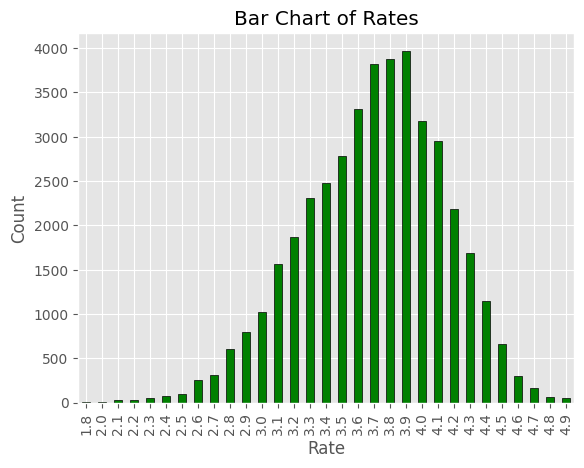

In [30]:
# Chcke after apply
import statistics as sta
df.rate.value_counts().sort_index().plot(kind = 'bar', color='green', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('Bar Chart of Rates')
plt.xticks(rotation=90);



## 📌 Votes
Counting votes 🗳️  
We’ll make sure vote numbers are numeric and ready for analysis.

---

In [31]:
df.votes.describe()

count   41,665.00
mean       351.65
std        881.80
min          0.00
25%         21.00
50%         73.00
75%        276.00
max     16,832.00
Name: votes, dtype: float64

In [32]:
df.votes.unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [33]:
# Cast Votes to Float 
df.votes = df.votes.apply(lambda x: int(x))
print("Done : " , df.votes.isnull().sum())

Done :  0




## 📌 Online_order & Book_table
Can you order online? 🍽️📱  
We’ll tidy these columns to know which restaurants offer online orders or table booking.

---

In [34]:
# Check the Value Count of "Online_order & Book_table" in order to conver "YES/No" to binary "0/1"
for i in ['online_order' , 'book_table']:
    print(i)
    display(df[i].value_counts().reset_index())

online_order


,online_order,count
0,Yes,27206
1,No,14459


book_table


,book_table,count
0,No,35361
1,Yes,6304


In [35]:
# Define Function to Convert "YES/No" to "0/1"
df['online_order'] = df['online_order'].map({"Yes" : 1, "No": 0})
df['book_table'] = df['book_table'].map({"Yes" : 1, "No": 0})

# Recheck output
for i in ['online_order' , 'book_table']:
    print(i)
    display(df[i].value_counts().reset_index())

online_order


,online_order,count
0,1,27206
1,0,14459


book_table


,book_table,count
0,0,35361
1,1,6304




## 📌 Phone
Contact info time ☎️  
We’ll count phone lines, create binary flags, and make sure every restaurant has phone info.

---

In [36]:
df.phone.describe()

count            40851
unique           12198
top       080 43334321
freq               181
Name: phone, dtype: object

In [37]:
df.phone.isnull().sum()

814

In [38]:
# Define Function to convert all Phone availabilty to "count of phone lines in each resturant" - For testing result
def PHONE (x):
    if pd.isna(x):
        return 0
    else:
        return len(x.split('\r\n'))
print("Test Case 1 :" , PHONE ('080 25287379\r\r\r\n+91 9845100909'))
print("Test Case 2 :" , PHONE (' +91 9986236425\r\n+91 9986969992 '))
print("Test Case 3 :" , PHONE ('+91 9886808462\n+91 8884308040'))
print("Final Case Unique :" , df.phone.apply(PHONE).unique().tolist())

Test Case 1 : 2
Test Case 2 : 2
Test Case 3 : 1
Final Case Unique : [2, 1, 0]


In [39]:
# Now after check the count of phone lines in all data, see to set the defult value "YES/No" instated of "count of phone lines in each resturant"
def PHONE_1 (x):
    if pd.isna(x):
        return 0
    else:
        return 1
print("Test Case 1 :" , PHONE ('080 25287379\r\r\r\n+91 9845100909'))
print("Test Case 2 :" , PHONE (' +91 9986236425\r\n+91 9986969992 '))
print("Test Case 3 :" , PHONE ('+91 9886808462\n+91 8884308040'))
print("Final Case Unique :" , df.phone.apply(PHONE_1).unique().tolist())

Test Case 1 : 2
Test Case 2 : 2
Test Case 3 : 1
Final Case Unique : [1, 0]


In [40]:
# Apply PHONE_1 to phone column
df.phone = df.phone.apply(PHONE_1)

In [41]:
# Check after apply
df.phone.value_counts()

phone
1    40851
0      814
Name: count, dtype: int64

In [42]:
# Check after apply
df.head(2)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
0,Jalsa,1,1,4.10,775,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,1,0,4.10,787,1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari




## 📌 Location
The location column is already clean, so we can leave it as is.
---

* No change in Location Column

## 📌 Rest_type
After checking the column, we found a few messy rows.  
Dropping **149 rows** is easier than trying to guess what’s missing — sometimes less is more! 🧹✨

---

In [43]:
# Check Sample
df.sample(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
33841,Koylas,1,0,3.00,11,1,Brookefield,Quick Bites,"Kebab, Mughlai, Biryani",400,[],Dine-out,Marathahalli
26654,Cinnamon's Kitchen,1,0,3.70,25,1,Old Airport Road,Quick Bites,"North Indian, South Indian, Fast Food",300,"['Chicken [6 Pieces]', 'Paneer Roll', 'Mushroom Roll', 'Mixed Vegetable Roll', 'Onion Roll', 'Ch...",Delivery,Koramangala 6th Block
8790,D View Cafe,1,0,4.00,508,1,JP Nagar,"Cafe, Quick Bites","Cafe, Italian, Chinese, Beverages","1,000",[],Dine-out,BTM
8543,Kataria's Home Food,1,0,3.10,40,1,BTM,Quick Bites,North Indian,400,[],Dine-out,BTM
33215,Kalinga Delicacies Restaurant,1,0,3.20,13,1,Brookefield,Casual Dining,"North Indian, Bengali, Oriya, Chinese",500,"['Aloo Chop [10 Pieces]', 'Dahi Vada Aloo Dum [3 Pieces]', 'Chhena Poda [500 grams]', '2 Lencha'...",Delivery,Marathahalli


In [44]:
# View null count
df.rest_type.isnull().sum()

149

In [45]:
# Explore the Unique count of "Rest Type"
df.rest_type.nunique()

87

In [46]:
# Exploring "rest_type" Types overall data
RestType = df.rest_type.str.split(',').explode().str.strip().unique()
print(len(RestType))
RestType

25


array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Kiosk', 'Food Truck',
       'Microbrewery', 'Lounge', 'Food Court', nan, 'Dhaba', 'Club',
       'Irani Cafee', 'Confectionery', 'Bhojanalya', 'Meat Shop'],
      dtype=object)

In [47]:
# Check Null data
df[df.rest_type.isnull()]

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
852,Mughlai Kitchen,1,0,3.50,269,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,"['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken Hariyali Kabab [5 Pieces]', 'Paneer Tikka', 'Bonel...",Delivery,Bannerghatta Road
1119,Eat & Joy Restaurant,1,0,3.00,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,Bannerghatta Road
1180,Kababish Restaurant,1,0,3.60,15,1,BTM,NaN,"North Indian, Chinese, Arabian",700,[],Delivery,Bannerghatta Road
1353,Ammi's Biryani,0,0,2.40,392,1,Bannerghatta Road,NaN,"Biryani, North Indian",500,[],Delivery,Bannerghatta Road
1621,Ammi's Biryani,0,0,2.40,392,1,Bannerghatta Road,NaN,"Biryani, North Indian",500,[],Dine-out,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40303,Paratha's Kitchen,1,0,2.80,33,1,Bellandur,NaN,"North Indian, South Indian",200,"['Paneer Paratha', 'Sathu Paratha', 'Aloo Paratha Combo with Chole', 'Sathu Paratha Combo with C...",Dine-out,Sarjapur Road
40340,New Andhra Spicy,1,0,3.60,11,1,Bellandur,NaN,"North Indian, Chinese, Andhra, South Indian, Biryani",200,[],Dine-out,Sarjapur Road
40659,Special Biryani House,1,0,3.20,202,1,Whitefield,NaN,"North Indian, Biryani, Chinese",400,[],Delivery,Whitefield
41007,Vijayawada Heights,1,0,3.20,8,1,Whitefield,NaN,North Indian,600,[],Delivery,Whitefield


In [48]:
df[df.name == 'Mughlai Kitchen']

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
852,Mughlai Kitchen,1,0,3.50,269,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,"['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken Hariyali Kabab [5 Pieces]', 'Paneer Tikka', 'Bonel...",Delivery,Bannerghatta Road
1927,Mughlai Kitchen,1,0,3.50,269,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,[],Dine-out,Bannerghatta Road
7569,Mughlai Kitchen,1,0,3.50,270,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,[],Delivery,BTM
8443,Mughlai Kitchen,1,0,3.50,270,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,"['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken Hariyali Kabab [5 Pieces]', 'Chicken 65', 'Chilli ...",Dine-out,BTM
17572,Mughlai Kitchen,1,0,3.50,270,1,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,[],Delivery,JP Nagar


In [49]:
df[df.name == 'Eat & Joy Restaurant']

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
1119,Eat & Joy Restaurant,1,0,3.00,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,Bannerghatta Road
1847,Eat & Joy Restaurant,1,0,3.00,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Dine-out,Bannerghatta Road
8013,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,BTM
16044,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,Jayanagar
17886,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,JP Nagar
18590,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Dine-out,JP Nagar


In [50]:
df[ (df.rest_type.isnull()) & (df.name == 'Eat & Joy Restaurant')]

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
1119,Eat & Joy Restaurant,1,0,3.00,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,Bannerghatta Road
1847,Eat & Joy Restaurant,1,0,3.00,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Dine-out,Bannerghatta Road
8013,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,BTM
16044,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,Jayanagar
17886,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Delivery,JP Nagar
18590,Eat & Joy Restaurant,1,0,3.10,7,1,JP Nagar,NaN,"Fast Food, Finger Food",300,[],Dine-out,JP Nagar


In [51]:
# Drop Null Values of "Rest Type"
print("Before Drop",df.shape)
df.dropna(subset='rest_type' , inplace=True)
print("After Drop",df.shape)

Before Drop (41665, 13)
After Drop (41516, 13)


In [52]:
df.rest_type.value_counts()[:10].reset_index()

,rest_type,count
0,Quick Bites,13944
1,Casual Dining,9659
2,Cafe,3405
3,Dessert Parlor,1864
4,Delivery,1680
5,"Takeaway, Delivery",1292
6,"Casual Dining, Bar",1110
7,Bakery,704
8,Bar,651
9,Beverage Shop,642


In [53]:
# Check the rows that contains multiple types in same row
df[ (df.rest_type.str.contains(',')) & (df.cuisines.str.contains(',')) ]

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
2,San Churro Cafe,1,0,3.80,918,1,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
7,Onesta,1,1,4.60,2556,1,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,[],Cafes,Banashankari
14,San Churro Cafe,1,0,3.80,918,1,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Cafes,Banashankari
23,My Tea House,1,0,3.60,62,1,Banashankari,"Quick Bites, Cafe","Italian, Fast Food, Cafe, European",600,[],Cafes,Banashankari
26,Coffee Tindi,1,0,3.80,75,1,Banashankari,"Cafe, Quick Bites","Cafe, South Indian",200,[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41656,Izakaya Gastro Pub,1,1,3.80,128,1,Whitefield,"Bar, Casual Dining","North Indian, Continental, Mediterranean","1,200",[],Pubs and bars,Whitefield
41659,Keys Cafe - Keys Hotel,0,0,2.80,161,1,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian","1,200",[],Pubs and bars,Whitefield
41660,The Farm House Bar n Grill,0,0,3.70,34,1,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,[],Pubs and bars,Whitefield
41661,Bhagini,0,0,2.50,81,1,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,[],Pubs and bars,Whitefield



## 📌 Cuisines
The food column needs some love 🍝🥗  
We’ll tidy up multiple cuisines, remove empty values, and make sure every dish has a proper place.

---

In [54]:
df.sample(4)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
40097,Gabbar Chai,0,0,3.70,74,0,Sarjapur Road,Cafe,"Cafe, Tea",NaN,[],Dine-out,Sarjapur Road
15855,Hotel Godavari,1,0,3.90,222,1,BTM,Casual Dining,"Andhra, Chinese, North Indian, Biryani",500,"['Plate Meal', 'Carrier Meal', 'Full Meal', 'Non Veg Combo Meal', 'Curd Rice', 'Biryani Rice', '...",Delivery,Jayanagar
38661,The Oriental Spice - Ashraya Hotel,1,0,3.80,159,1,Infantry Road,Casual Dining,"Chinese, Thai, Indonesian","1,300",[],Delivery,Residency Road
11244,The Terminus - The Oterra,0,1,4.00,119,1,Electronic City,Lounge,"Finger Food, Continental","2,500",[],Dine-out,Electronic City


In [55]:
# Check Null Count
df.cuisines.isnull().sum()

11

In [56]:
# Drop the few rows of cuisines
print("Before Drop" , df.shape)
df.dropna(subset='cuisines' , inplace=True)
print("After Drop" , df.shape)

Before Drop (41516, 13)
After Drop (41505, 13)


In [57]:
# Check Unique Values counts
df.cuisines.nunique()

2374

In [58]:
# Check Unique Values
df.cuisines.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [59]:
# Check Sample
df.cuisines.sample(10)

309                                         Chinese, North Indian
36350                                                North Indian
28601                                        Mangalorean, Seafood
38403                                                     Burmese
21963                                   North Indian, Continental
36342                                             Kerala, Seafood
5563                               North Indian, Chinese, Biryani
9447                                             Bakery, Desserts
9182     Finger Food, North Indian, Seafood, Mangalorean, Chinese
28342                                            Fast Food, Rolls
Name: cuisines, dtype: object

In [60]:
# Exploring "cuisines" Types overall data
CusLst = df.cuisines.str.split(',').explode().str.strip().unique()
print(len(CusLst.tolist()))
CusLst

105


array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Andhra', 'Pizza',
       'Continental', 'Momos', 'Beverages', 'Fast Food', 'American',
       'French', 'European', 'Bakery', 'Burger', 'Desserts', 'Biryani',
       'Street Food', 'Rolls', 'Ice Cream', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Mithai', 'Iranian', 'Sandwich', 'Mangalorean',
       'Juices', 'Vietnamese', 'Hyderabadi', 'Bengali', 'Arabian', 'BBQ',
       'Tea', 'Afghani', 'Lebanese', 'Finger Food', 'Tibetan',
       'Charcoal Chicken', 'Middle Eastern', 'Mediterranean', 'Kerala',
       'Oriya', 'Bihari', 'Roast Chicken', 'Bohri', 'African', 'Nepalese',
       'Maharashtrian', 'Tamil', 'Tex-Mex', 'Belgian', 'Gujarati',
       'South American', 'Konkan', 'Chettinad', 'Wraps', 'Coffee',
       'Turkish', 'Afghan', 'Modern Indian', 'Lucknowi', 'Australian',
       'Spanish', 

In [61]:
# ==============================
# 🔹 Deep Column Analyzer
# ==============================

class DeepColumnAnalyzer:
    """
    Deep Analysis for Columns with Multiple Values per Cell.
    
    Features:
    - calculate_col_counts: Count occurrences of unique items
    - col_details: Pivot table (Crosstab) by bins
    - cols_above_median: Filter items above median count
    - calculate_col_quantiles: Calculate quantiles and plot bar chart
    - heatmap: Plot heatmap for visual analysis
    - analyze: Wrapper to run full analysis
    """
    
    pd.options.display.float_format = '{:,.2f}'.format
    
    def __init__(self, df, column_name, quantile_list, bins_list, labels_list):
        self.df = df
        self.column_name = column_name
        self.quantile_list = quantile_list
        self.bins_list = bins_list
        self.labels_list = labels_list
        self.col_counts_df = None
        self.col_details_df = None
        self.above_median_df = None

    # -----------------------------
    # Method 1: Count unique items
    # -----------------------------
    def calculate_col_counts(self):
        """
        Explodes the column, counts occurrences of each unique item,
        and bins the counts into the provided labels.
        """
        items = self.df[self.column_name].dropna().astype(str).str.split(',').explode().str.strip().unique()
        counts_dict = {item: self.df[self.column_name].dropna().str.contains(item).sum() for item in items}
        
        self.col_counts_df = pd.DataFrame(list(counts_dict.items()), columns=[self.column_name, 'Count'])
        self.col_counts_df = self.col_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
        
        # Binning
        self.col_counts_df['binned'] = pd.cut(self.col_counts_df['Count'], bins=self.bins_list, labels=self.labels_list, include_lowest=True)
        return self.col_counts_df

    # -----------------------------
    # Method 2: Pivot / Crosstab
    # -----------------------------
    def col_details(self):
        """
        Generates a crosstab of counts per bin and adds a total column.
        """
        if self.col_counts_df is None:
            self.calculate_col_counts()
        
        self.col_details_df = pd.crosstab(
            self.col_counts_df[self.column_name], 
            self.col_counts_df['binned'], 
            values=self.col_counts_df['Count'], 
            aggfunc='sum'
        ).fillna(0)
        
        self.col_details_df['All'] = self.col_details_df.sum(axis=1)
        self.col_details_df = self.col_details_df.sort_values(by='All', ascending=False)
        return self.col_details_df

    # -----------------------------
    # Method 3: Filter items above median
    # -----------------------------
    def cols_above_median(self):
        """
        Returns items with total counts above or equal to the median.
        """
        if self.col_details_df is None:
            self.col_details()
        
        median_val = self.col_details_df['All'].median()
        self.above_median_df = self.col_details_df[self.col_details_df['All'] >= median_val]
        return self.above_median_df

    # -----------------------------
    # Method 4: Quantiles and Bar Plot
    # -----------------------------
    def calculate_col_quantiles(self, quantile_intervals=None):
        """
        Calculate quantiles for 'Count' column and plot a bar chart.
        """
        if self.col_counts_df is None:
            self.calculate_col_counts()
        
        if quantile_intervals is None:
            quantile_intervals = self.quantile_list
        
        quantiles = self.col_counts_df['Count'].quantile(quantile_intervals)
        print("\nQuantiles for '{}':\n".format(self.column_name))
        display(quantiles)
        quantiles.plot(kind='bar', figsize=(10,5), title=f"{self.column_name} Quantiles")
        plt.show()
        return quantiles

    # -----------------------------
    # Method 5: Heatmap
    # -----------------------------
    def heatmap(self, data, title=None, xlabel=None, cmap='Greens'):
        """
        Plots a heatmap of the provided DataFrame.
        """
        plt.figure(figsize=(15, 10))
        sns.heatmap(data, annot=True, fmt='.0f', cmap=cmap, annot_kws={"size": 10})
        plt.title(title if title else f"Heatmap of {self.column_name}")
        plt.xlabel(xlabel if xlabel else self.column_name)
        plt.ylabel("Items")
        plt.show()

    # -----------------------------
    # Method 6: Full Analysis Wrapper
    # -----------------------------
    def analyze(self):
        """
        Run full analysis: counts, crosstab, filter above median, and heatmap.
        """
        self.calculate_col_counts()
        self.col_details()
        self.cols_above_median()
        median_val = self.col_details_df['All'].median()
        self.heatmap(self.above_median_df, 
                     title=f"{self.column_name} counts above median ({median_val})",
                     xlabel=self.column_name)


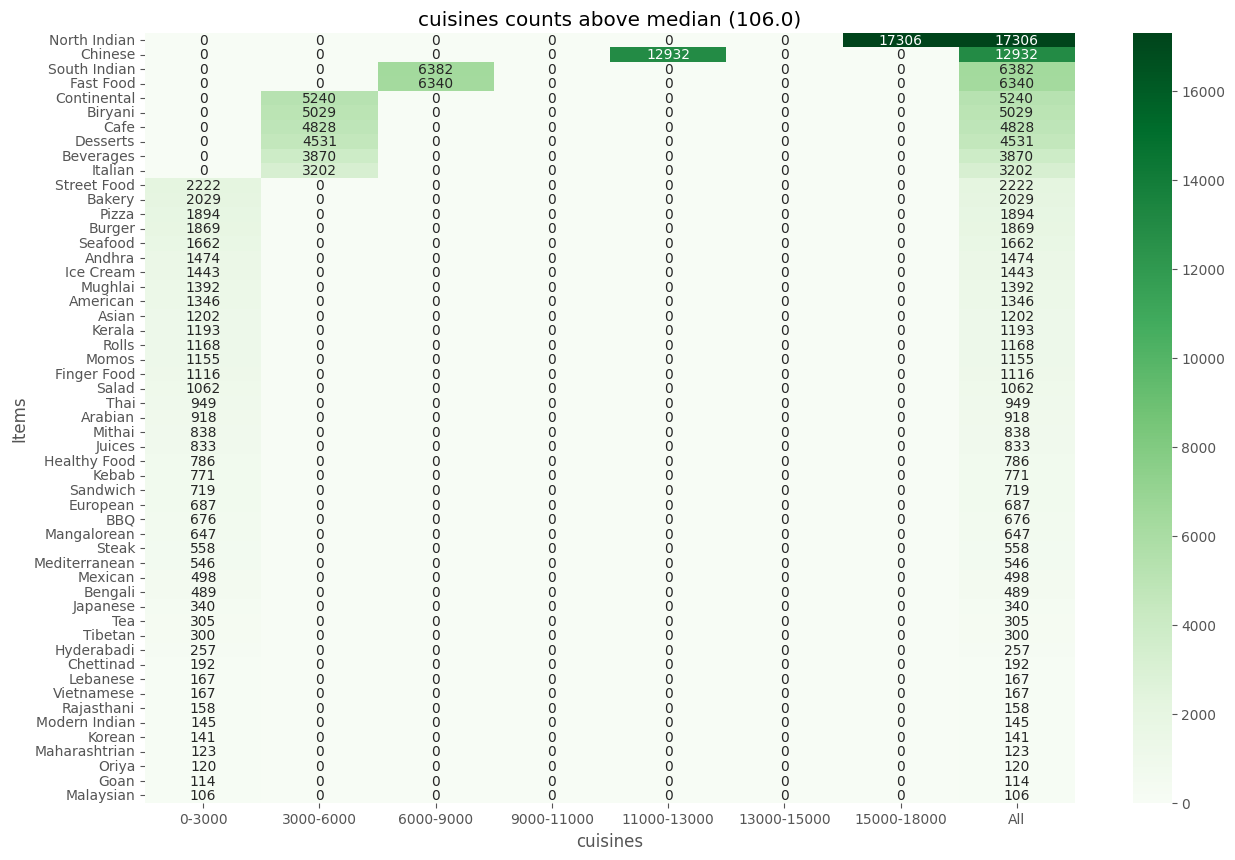

count      105.00
mean     1,010.58
std      2,412.05
min          1.00
25%         23.00
50%        106.00
75%        918.00
max     17,306.00
Name: Count, dtype: float64


Quantiles for 'cuisines':



0.00        1.00
0.20       14.40
0.40       60.40
0.50      106.00
0.75      918.00
0.95    4,988.80
0.97    6,208.00
1.00   17,306.00
Name: Count, dtype: float64

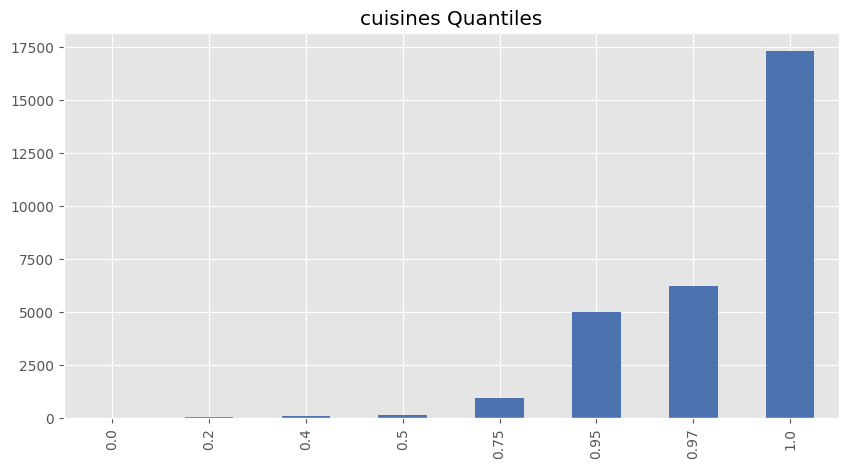

0.00        1.00
0.20       14.40
0.40       60.40
0.50      106.00
0.75      918.00
0.95    4,988.80
0.97    6,208.00
1.00   17,306.00
Name: Count, dtype: float64

In [62]:
# ==============================
# 🔹 cuisines Deep Column Analyzer
# ==============================

cuisines_analyzer = DeepColumnAnalyzer(
    df=df,  
    column_name='cuisines', 
    quantile_list=[0 , 0.2 , 0.4 , 0.5 , 0.75 , 0.95 , 0.97 , 1], 
    bins_list=[0, 3000, 6000, 9000, 11000, 13000 , 15000 , 18000], 
    labels_list=["0-3000", "3000-6000", "6000-9000", "9000-11000", "11000-13000" , "13000-15000" , "15000-18000"]
)

# 🔹 Run full analysis: counts, crosstab, filter above median, heatmap
cuisines_analyzer.analyze()

# 🔹 Describe filtered data (Count statistics)
display(cuisines_analyzer.calculate_col_counts()['Count'].describe())

# 🔹 Plot quantiles for the 'cuisines' column
cuisines_analyzer.calculate_col_quantiles()


In [63]:
# cuisines Output
cuisines_analyzer.calculate_col_counts()

,cuisines,Count,binned
0,North Indian,17306,15000-18000
1,Chinese,12932,11000-13000
2,South Indian,6382,6000-9000
3,Fast Food,6340,6000-9000
4,Continental,5240,3000-6000
...,...,...,...
100,Sindhi,4,0-3000
101,Hot dogs,3,0-3000
102,Belgian,3,0-3000
103,Paan,2,0-3000


Text(0.5, 1.0, 'cuisines_analyzer of Quantile Distribution')

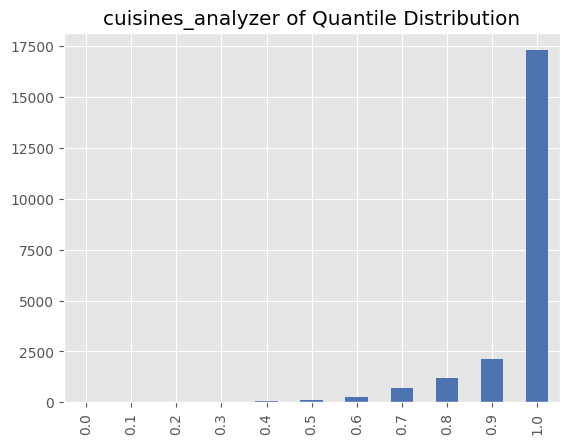

In [64]:
# cuisines 
cuisines_analyzer.calculate_col_counts()['Count'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).plot(kind='bar')
plt.title('cuisines_analyzer of Quantile Distribution')




## 📌 Approx Cost
Money matters 💵💳  
We’ll convert costs to numbers, handle missing values, and make sure all prices are ready for calculations.

---

In [65]:
df.head(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
0,Jalsa,1,1,4.10,775,1,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,1,0,4.10,787,1,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.80,918,1,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.70,88,1,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,0,0,3.80,166,1,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


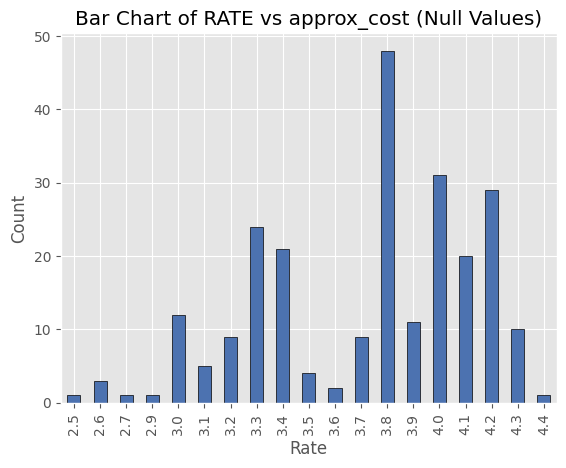

In [66]:
# Explore distribution of null values of "approx_cost"
df[df.approx_cost.isnull()].groupby('rate')['name'].count().plot(kind='bar', edgecolor='black')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.title('Bar Chart of RATE vs approx_cost (Null Values)')
plt.xticks(rotation=90);

In [67]:
# Drop Null Values if "approx_cost"
print("Before Drop" , df.shape)
df.dropna(subset='approx_cost' , inplace=True)
print("After Drop" , df.shape)

Before Drop (41505, 13)
After Drop (41263, 13)


In [68]:
# Final Chcek for null status
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
cuisines        0
approx_cost     0
menu_item       0
listed_type     0
listed_city     0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 41664
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  int64  
 2   book_table    41263 non-null  int64  
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   phone         41263 non-null  int64  
 6   location      41263 non-null  object 
 7   rest_type     41263 non-null  object 
 8   cuisines      41263 non-null  object 
 9   approx_cost   41263 non-null  object 
 10  menu_item     41263 non-null  object 
 11  listed_type   41263 non-null  object 
 12  listed_city   41263 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 4.4+ MB


In [70]:
df.approx_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [72]:
# 🔹 Define Function to convert Object type to Float Type
def convert_to_float(x):
    if "," in x:
        return float(x.replace(",", ""))
    else:
        return float(x)

# 🔹 Test Cases
print("Test Case 1:", convert_to_float('2,600'))
print("Test Case 2:", convert_to_float('199'))
print("Test Case 3:", convert_to_float('4,500'))

# 🔹 Apply to the DataFrame column
print("Final Case Unique:", df.approx_cost.apply(convert_to_float).unique().tolist())


Test Case 1: 2600.0
Test Case 2: 199.0
Test Case 3: 4500.0
Final Case Unique: [800.0, 300.0, 600.0, 700.0, 550.0, 500.0, 450.0, 650.0, 400.0, 900.0, 200.0, 750.0, 150.0, 850.0, 100.0, 1200.0, 350.0, 250.0, 950.0, 1000.0, 1500.0, 1300.0, 199.0, 1100.0, 1600.0, 230.0, 130.0, 1700.0, 1350.0, 2200.0, 1400.0, 2000.0, 1800.0, 1900.0, 180.0, 330.0, 2500.0, 2100.0, 3000.0, 2800.0, 3400.0, 50.0, 40.0, 1250.0, 3500.0, 4000.0, 2400.0, 2600.0, 1450.0, 70.0, 3200.0, 240.0, 6000.0, 1050.0, 2300.0, 4100.0, 120.0, 5000.0, 3700.0, 1650.0, 2700.0, 4500.0, 80.0]


In [73]:
# Apply the Function
df.approx_cost = df.approx_cost.apply(convert_to_float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41263 entries, 0 to 41664
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41263 non-null  object 
 1   online_order  41263 non-null  int64  
 2   book_table    41263 non-null  int64  
 3   rate          41263 non-null  float64
 4   votes         41263 non-null  int64  
 5   phone         41263 non-null  int64  
 6   location      41263 non-null  object 
 7   rest_type     41263 non-null  object 
 8   cuisines      41263 non-null  object 
 9   approx_cost   41263 non-null  float64
 10  menu_item     41263 non-null  object 
 11  listed_type   41263 non-null  object 
 12  listed_city   41263 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 4.4+ MB




## 📌 Menu Item
Let’s check if restaurants have menu items listed 🍲🍔  
Tiny number of missing values? No worries, we can fill or adjust them easily.

---


In [74]:
df.sample(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
30674,ThrowBack - Pub & Dine,0,0,3.90,234,1,Langford Town,"Bar, Casual Dining","Italian, North Indian, Continental","1,000.00",[],Delivery,Lavelle Road
7827,Two States,0,0,3.40,5,1,BTM,Quick Bites,"North Indian, South Indian, Chinese, Street Food",250.00,[],Delivery,BTM
16970,Leon Grill,1,0,4.10,421,1,Jayanagar,Quick Bites,"Burger, Fast Food",500.00,"['Peri Peri Chicken', 'Peri Peri Wings', 'Hot and Spicy Wings', 'Chicken Doner Salad', 'Tandoori...",Dine-out,Jayanagar
18746,Box Magic,1,0,3.70,22,1,Bannerghatta Road,Quick Bites,"North Indian, South Indian, Seafood, Rolls",400.00,"['Veg Thali', 'Chicken Thali', 'Fish Thali', 'Veg Pulav', 'Dal Khichdi', 'Palak Khichdi', 'Curd ...",Dine-out,JP Nagar
23773,Lassi Berg,1,0,3.50,13,1,BTM,Takeaway,Juices,100.00,"['Egg with Chicken Roll', 'Lassi Sandwich Combo', 'Lassi BurgerCombo', 'Biryani Rice', 'Chicken ...",Delivery,Koramangala 5th Block


In [75]:
# 🔹 Define Function to convert all menu_item availability to binary (0/1)
def menu_item_binary(x):
    if "[]" in x:
        return 0
    else:
        return 1

# 🔹 Test Cases
print("Test Case 1:", menu_item_binary(df[df.menu_item != '[]']['menu_item'].iloc[0]))

# 🔹 Apply to the DataFrame column
print("Final Case Unique:", df.menu_item.apply(menu_item_binary).unique().tolist())

# 🔹 Display value counts
display(df.menu_item.apply(menu_item_binary).value_counts().reset_index().rename(columns={'index': 'menu_item', 'menu_item': 'count'}))


Test Case 1: 1
Final Case Unique: [0, 1]


,count,count
0,0,30337
1,1,10926


In [76]:
# Apply Function Menu Items
df.menu_item = df.menu_item.apply(menu_item_binary)
df.menu_item.value_counts().reset_index()

,menu_item,count
0,0,30337
1,1,10926


In [77]:
df.sample(5)

,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost,menu_item,listed_type,listed_city
27918,Vegetarea,1,0,3.80,40,1,BTM,"Takeaway, Delivery",South Indian,250.00,1,Delivery,Koramangala 7th Block
640,VEGeatz,1,0,3.40,19,1,Banashankari,Quick Bites,"South Indian, North Indian",200.00,0,Dine-out,Banashankari
32852,Vishwaas Take Away,0,0,3.20,7,1,Marathahalli,Quick Bites,"North Indian, Chinese",250.00,0,Delivery,Marathahalli
24990,Enerjuvate Studio & Cafe,1,1,4.40,466,1,Koramangala 4th Block,Cafe,"Cafe, Continental, Healthy Food, Sandwich, Pizza, Desserts, Beverages",800.00,0,Dine-out,Koramangala 5th Block
34588,Ambur Hot Dum Biryani,0,0,3.10,7,1,Ulsoor,Quick Bites,Biryani,300.00,0,Delivery,MG Road



## 📌 Listed_type
A tiny column, but still important 🏷️📌  
We’ll make sure each restaurant has its correct type listed.

---

In [78]:
df.listed_type.value_counts()

listed_type
Delivery              20452
Dine-out              14066
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  848
Pubs and bars           632
Name: count, dtype: int64



## 📌 Listed_city
City, city, city! 🌆🏙️  
We’ll clean up this column, fix typos, and ensure it matches locations consistently.

---


In [79]:
df.listed_city.isnull().sum()

0

In [80]:
df.listed_city.value_counts()

listed_city
BTM                      2586
Koramangala 7th Block    2361
Koramangala 4th Block    2254
Koramangala 5th Block    2250
Koramangala 6th Block    2121
Jayanagar                1918
JP Nagar                 1633
Indiranagar              1538
Church Street            1518
MG Road                  1514
Brigade Road             1483
Lavelle Road             1451
Residency Road           1345
HSR                      1330
Marathahalli             1294
Bannerghatta Road        1208
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Kammanahalli             1020
Sarjapur Road            1018
Kalyan Nagar              993
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           820
Banashankari              727
New BEL Road              569
Name: count, dtype: int64

In [81]:
# 🔹 Define the function to compare listed_city and location
def compare_city_location(x, y):
    if x == y:
        return 'Match'
    else:
        return 'Not Match'

# 🔹 Use apply to compare each row
df['Match'] = df.apply(lambda row: compare_city_location(row['listed_city'], row['location']), axis=1)

# 🔹 Display the resulting DataFrame
df[['listed_city', 'location', 'Match']]


,listed_city,location,Match
0,Banashankari,Banashankari,Match
1,Banashankari,Banashankari,Match
2,Banashankari,Banashankari,Match
3,Banashankari,Banashankari,Match
4,Banashankari,Basavanagudi,Not Match
...,...,...,...
41660,Whitefield,Whitefield,Match
41661,Whitefield,Whitefield,Match
41662,Whitefield,Whitefield,Match
41663,Whitefield,"ITPL Main Road, Whitefield",Not Match


In [82]:
df.Match.value_counts()

Match
Not Match    28664
Match        12599
Name: count, dtype: int64

In [83]:
df[df.Match == 'Not Match'][['location' , 'listed_city']]

,location,listed_city
4,Basavanagudi,Banashankari
5,Basavanagudi,Banashankari
6,Mysore Road,Banashankari
29,Basavanagudi,Banashankari
30,Basavanagudi,Banashankari
...,...,...
41595,KR Puram,Whitefield
41597,Brookefield,Whitefield
41632,"ITPL Main Road, Whitefield",Whitefield
41663,"ITPL Main Road, Whitefield",Whitefield


In [84]:
df = df.drop('Match' , axis=1).reset_index(drop = True)

In [85]:
# Check & Drop Duplicated
print("✔️ Before Drop" , df.shape)
print("✔️ Duplicated Count" , df.duplicated().sum() )
df.drop_duplicates(inplace=True)
print("✔️ After Drop" , df.shape)

✔️ Before Drop (41263, 13)
✔️ Duplicated Count 58
✔️ After Drop (41205, 13)


# ✅ 03 - Feature Engineering
We are now creating all the cool features for **Restaurant Success Prediction** 🚀
Success is defined as `rate >= 3.75`. Let's go step by step!


## 📌 Step 1: Initialize Cuisine & Restaurant Type Groups
Here we define **groupings for cuisines and restaurant types** to later create meaningful features 🍛🏷️


In [86]:
# Step 1: Cuisine & RestType Groups
logger.info("Initializing cuisine and restaurant type groups ...")

cuisine_groups = {
    'Total_North_Indian': ['Awadhi','Bihari','Kashmiri','Lucknowi','Mughlai','Punjabi','Rajasthani'],
    'Total_South_Indian': ['Andhra','Chettinad','Hyderabadi','Kerala','Mangalorean','Tamil','Udupi'],
    'Total_East_Indian':  ['Assamese','Bengali','Oriya'],
    'Total_West_Indian':  ['Gujarati','Maharashtrian','Goan','Sindhi'],
    'Total_International':['American','British','French','German','Greek','Italian','Japanese','Lebanese',
                           'Mediterranean','Mexican','Portuguese','Spanish','Turkish','Vietnamese','Russian',
                           'South American','Sri Lankan','Tibetan','Middle Eastern','Asian','European'],
    'Total_Asian': ['Burmese','Cantonese','Chinese','Indonesian','Korean','Mongolian','Nepali',
                    'North Eastern','Pan Asian','Singaporean','Thai','Tibetan','Vietnamese','Japanese'],
    'Total_Grill_BBQ_Bar': ['BBQ','Bar Food','Charcoal Chicken','Grill','Kebab','Roast Chicken','Rolls','Steak'],
    'Total_Fast_Food': ['Burger','Fast Food','Finger Food','Hot dogs','Sandwich','Street Food','Wraps','Tex-Mex'],
    'Total_Beverages_Desserts': ['Beverages','Bubble Tea','Coffee','Desserts','Ice Cream','Juices','Mithai','Paan','Tea'],
    'Total_Healthy_Fusion': ['Healthy Food','Vegan','Modern Indian','Salad'],
    'Total_Bakery': ['Bakery','Parsi','Cake','Sweets']
}

rest_type_groups = {
    'Rest_SweetOrBakery': ['Bakery','Confectionery','Dessert Parlor','Sweet Shop'],
    'Rest_Drink_Oriented_Establishments': ['Bar','Club','Lounge','Microbrewery','Pub'],
    'Rest_Specialty_Shops': ['Beverage Shop','Bhojanalya','Food Truck','Irani Cafee','Kiosk','Meat Shop'],
    'Rest_Dining_Establishments': ['Cafe','Casual Dining','Dhaba','Fine Dining','Food Court','Mess','Quick Bites'],
    'Rest_Takeaway_and_Delivery': ['Delivery','Takeaway']
}


[INFO] Initializing cuisine and restaurant type groups ...


## 📌 Step 2: Helper Utilities
Some small helper functions to **split strings and count items in groups** 🔧


In [87]:
# Step 2: Helper Functions
def safe_split(val):
    try:
        return [x.strip() for x in val.split(',')]
    except:
        return []

def group_counter(items, groups_dict):
    counts = {name: 0 for name in groups_dict}
    for itm in items:
        for group, group_items in groups_dict.items():
            if itm in group_items:
                counts[group] += 1
    return counts


## 📌 Step 3: Create Target Column
We define the **target variable** based on the success threshold (rate >= 3.75) 🎯


In [88]:
# Step 3: Target Column
logger.info("Creating target column ...")
threshold = 3.75
df['target'] = (df['rate'] >= threshold).astype(int)

positives = df['target'].mean()
logger.info(f"Success ratio: {positives:.4f} ({df['target'].sum()} successful out of {len(df)})")


[INFO] Creating target column ...
[INFO] Success ratio: 0.4865 (20046 successful out of 41205)


## 📌 Step 4: Build Bins
We create **categorical bins** for rate, votes, and approx_cost for easier analysis 📊


In [89]:
# Step 4: Binning
logger.info("Creating bins for rate, votes, and approx_cost ...")

df['rateRange'] = pd.cut(df['rate'], bins=[0,1,2,3,4,5],
                         labels=['0-1','1-2','2-3','3-4','4-5'])

vote_bins = [df['votes'].min(),1000,3000,5000,7000,9000,11000,13000,15000,df['votes'].max()]
vote_lbls = ['0-1000','1000-3000','3000-5000','5000-7000','7000-9000','9000-11000',
             '11000-13000','13000-15000','15000-17000']
df['votesRange'] = pd.cut(df['votes'], bins=vote_bins, labels=vote_lbls).fillna('0-1000')

cost_bins = [0,100,200,500,1000,2000,3000,4000,5000,6000]
cost_lbls = ['0-100','100-200','200-500','500-1000','1000-2000',
             '2000-3000','3000-4000','4000-5000','5000-6000']
df['approx_cost_range'] = pd.cut(df['approx_cost'], bins=cost_bins, labels=cost_lbls)


[INFO] Creating bins for rate, votes, and approx_cost ...


## 📌 Step 5: Transform Cuisines
Convert the **cuisines column into multiple group features** for better modeling 🍛


# Step 5: Cuisines Transformation
logger.info("Transforming cuisines ...")
cuisine_counts = df['cuisines'].apply(lambda x: group_counter(safe_split(x), cuisine_groups)).apply(pd.Series)
df = pd.concat([df, cuisine_counts], axis=1)


In [90]:
# Step 5: Cuisines Transformation
logger.info("Transforming cuisines ...")
cuisine_counts = df['cuisines'].apply(lambda x: group_counter(safe_split(x), cuisine_groups)).apply(pd.Series)
df = pd.concat([df, cuisine_counts], axis=1)


[INFO] Transforming cuisines ...


## 📌 Step 6: Transform Restaurant Types
Convert the **rest_type column into multiple group features** 🏪


In [91]:
# Step 6: Rest Type Transformation
logger.info("Transforming restaurant types ...")
rest_counts = df['rest_type'].apply(lambda x: group_counter(safe_split(x), rest_type_groups)).apply(pd.Series)
df = pd.concat([df, rest_counts], axis=1)

logger.info("✅ Feature Engineering Done!")


[INFO] Transforming restaurant types ...
[INFO] ✅ Feature Engineering Done!


In [ ]:
project_structure/
│
├── app/
│   └── streamlit_app.py
│
├── data/
│   ├── raw/
│   ├── preprocessed/
│   └── processed/
│
├── models/
│   ├── saved_models/
│   ├── scalers/
│   └── encoders/
│
└── src/
    ├── data_pipeline.py
    ├── inference.py
    ├── model.py
    ├── train.py
    ├── utils.py
    └── __init__.py
